# Testing Models: K Nearest Neighbors #

In this notebook I will test K Nearest Neighbor models for both regression and classification.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn import neighbors
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from math import sqrt

In [2]:
# import data
df = pd.read_csv('data/cleaned_data/md_dum.csv')
car_y = df.car_acc_score
car_X = df.drop(columns=['Unnamed: 0', 'car_acc_score', 'car_dens_score', 'bike_dens_score'])
bike_y = df.bike_acc_score
bike_X = df.drop(columns=['Unnamed: 0', 'bike_acc_score', 'car_dens_score', 'bike_dens_score'])

In [3]:
# train test split for regression
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(car_X, car_y, test_size=0.3, random_state=18,
                                                                   shuffle=True, stratify=car_y)
X_bike_train, X_bike_test, y_bike_train, y_bike_test = train_test_split(bike_X, bike_y, test_size=0.3, random_state=18,
                                                                   shuffle=True, stratify=car_y)

### KNN Regression ###

First I want to find the right number of nearest neighbors for the KNN regressor by making an elbow plot.

In [4]:
rmse_val = []

for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_car_train, y_car_train)  #fit the model
    pred=model.predict(X_car_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_car_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 11.216850547521055
RMSE value for k=  2 is: 11.391273309575057
RMSE value for k=  3 is: 10.185526231463601
RMSE value for k=  4 is: 9.759526987688973
RMSE value for k=  5 is: 9.488318842170633
RMSE value for k=  6 is: 9.300098275525029
RMSE value for k=  7 is: 9.195613905350598
RMSE value for k=  8 is: 9.133199046589132
RMSE value for k=  9 is: 9.0749276669399
RMSE value for k=  10 is: 9.02123506048141


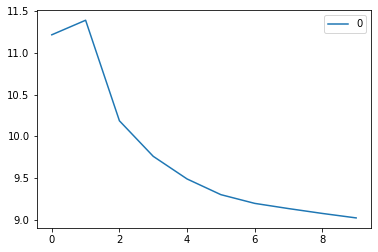

In [5]:
#elbow curve 
curve = pd.DataFrame(rmse_val) 
curve.plot()

6 looks like a good number of nearest neighbors

In [6]:
model = neighbors.KNeighborsRegressor(n_neighbors = 6)
model.fit(X_car_train, y_car_train) 
model.score(X_car_test, y_car_test)

-0.006893725310570753

That score means that KNN Regression is pretty useless for this data set. Let's see about classification.

### KNN Classification ###

In [7]:
car_c_y = df.car_acc_score.mask(df.car_acc_score > 0, 1)
X_car_c_train, X_car_c_test, y_car_c_train, y_car_c_test = train_test_split(car_X, car_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=car_c_y)
bike_c_y = df.bike_acc_score.mask(df.bike_acc_score > 0, 1)
X_bike_c_train, X_bike_c_test, y_bike_c_train, y_bike_c_test = train_test_split(bike_X, bike_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=bike_c_y)

In [8]:
model = neighbors.KNeighborsClassifier(n_neighbors = 6)
model.fit(X_car_c_train, y_car_c_train) 
model.score(X_car_c_test, y_car_c_test)

0.8439987408373432

That's much better. Let's see how the confusion matrix looks.

[[11065  1418]
 [ 2051  7703]]


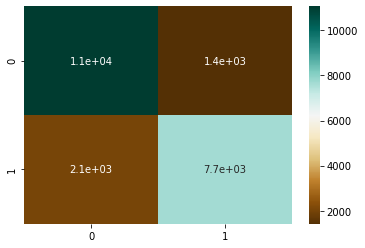

In [9]:
pred = model.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred)
print(c)
sns.heatmap(c,cmap='BrBG',annot=True)
plt.show()

In [12]:
print(classification_report(y_car_c_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     12483
           1       0.84      0.79      0.82      9754

    accuracy                           0.84     22237
   macro avg       0.84      0.84      0.84     22237
weighted avg       0.84      0.84      0.84     22237



Much better, much lower levels of false classifications. 

It's worth looking to see how this behaves with bike classification data also.

In [13]:
bike_knn  = neighbors.KNeighborsClassifier(n_neighbors = 6)
bike_knn.fit(X_bike_c_train, y_bike_c_train) 
bike_knn.score(X_bike_c_test, y_bike_c_test)

0.8612672572739128

[[16702   824]
 [ 2261  2450]]


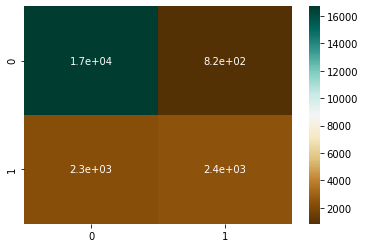

In [14]:
pred = bike_knn.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred)
print(c)
sns.heatmap(c,cmap='BrBG',annot=True)
plt.show()

In [15]:
print(classification_report(y_bike_c_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     17526
           1       0.75      0.52      0.61      4711

    accuracy                           0.86     22237
   macro avg       0.81      0.74      0.76     22237
weighted avg       0.85      0.86      0.85     22237



We get 10% false positives, but it still looks like the KNN classifier is a definitely contender! Next to try SVM regressors. [Go>>](Testing%20Models%20-%20SVM%20Regressors.ipynb)